In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1


In [23]:
#bfs 
def bfs_with_distance(adj_list, start, num_vertices):
    queue = [start]
    visited = [start]
    distances = [0] * num_vertices
    while queue:
        vertex = queue.pop(0)
        for neighbor in adj_list[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.append(neighbor)
                distances[neighbor] = distances[vertex] + 1
    return visited, distances

In [10]:
adj_list = [
    [1, 3],
    [2, 4],
    [5],
    [4],
    [5],
    []
]

# Test case 1:
start = 0
num_vertices = 6
order_visited, distances = bfs_with_distance(adj_list, start, num_vertices)
assert order_visited == [0, 1, 3, 2, 4, 5]
# assert distances == [0, 1, 1, 2, 2, 3]

# Test case 2:
start = 3
num_vertices = 6
order_visited, distances = bfs_with_distance(adj_list, start, num_vertices)
assert order_visited == [3, 4, 5]
# assert distances == [0, 1, 2, 0, 1, 2]

# Test case 3:
start = 5
num_vertices = 6
order_visited, distances = bfs_with_distance(adj_list, start, num_vertices)
assert order_visited == [5]
# assert distances == [0, float('inf'), float('inf'), float('inf'), float('inf'), 0]

print("All test cases passed!")

All test cases passed!


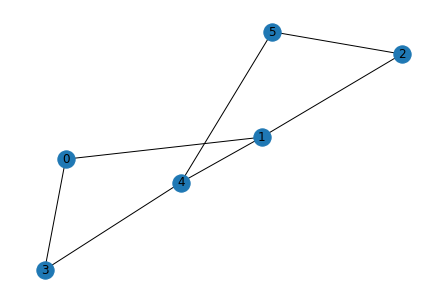

In [16]:
# plot the adjacency list using matplotlib
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(adj_list):
    g = nx.Graph()
    for i, neighbors in enumerate(adj_list):
        for neighbor in neighbors:
            g.add_edge(i, neighbor)
    nx.draw(g, with_labels=True)
    plt.show()
    
plot_graph(adj_list)



# Question 2


In [18]:
graph = {
    0: {1: 4, 2: 2},
    1: {2: 5, 3: 10},
    2: {1: 1, 3: 2},
    3: {0: 7, 3: 3}
}
graph


{0: {1: 4, 2: 2}, 1: {2: 5, 3: 10}, 2: {1: 1, 3: 2}, 3: {0: 7, 3: 3}}

In [19]:
source = 0
destination = 3

In [20]:
# heuristic function
def heuristic(node):
    return abs(node - destination)

In [21]:
# a_star function which returns the shortest path from the source node to the destination node 

def a_star(graph, source, destination):
    
    open_list = set([source])
    closed_list = set([])
    
    
    g = {}
    f = {}
    parent = {}
    
    for node in graph:
        g[node] = 1000000
        f[node] = 1000000
        
    g[source] = 0
    f[source] = 0
    
    while len(open_list) > 0:
        current_node = None
        current_f_value = None
        
        for node in open_list:
            if current_node is None:
                current_node = node
                current_f_value = f[node]
            elif f[node] < current_f_value:
                current_node = node
                current_f_value = f[node]
                
        if current_node == destination:
            path = [destination]
            while current_node in parent:
                current_node = parent[current_node]
                path.append(current_node)
            return path[::-1], g[destination]
        
        open_list.remove(current_node)
        closed_list.add(current_node)
        
        for neighbor in graph[current_node]:
            if neighbor in closed_list:
                continue
            if neighbor not in open_list:
                open_list.add(neighbor)
            
            if g[neighbor] > g[current_node] + graph[current_node][neighbor]:
                g[neighbor] = g[current_node] + graph[current_node][neighbor]
                f[neighbor] = g[neighbor] + heuristic( neighbor)
                parent[neighbor] = current_node
                 
    return None

In [26]:
# call the a_star function
path, weight = a_star(graph, source, destination)

print("path of A* " , path)

print("weight of path " , weight)


path of A*  [0, 2, 3]
weight of path  4
